In [14]:
#	Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
import pandas as pd

df = pd.read_csv("sales_data_with_discounts.csv")
print(df.head())

         Date       Day  SKU City  Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C      15  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C      10  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C       7  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C       6  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C       3  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      12100             181500          11.654820     21153.498820   
1      10100             101000          11.560498     11676.102961   
2      16100             112700           9.456886     10657.910157   
3      20100             120600           6.935385      8364.074702   
4       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  


In [15]:
#	Identify numerical columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [7]:

numerical_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns


In [8]:
cat_cols

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

In [9]:
numerical_cols 

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [23]:
#	Calculate the mean, median, mode, and standard deviation for these columns.
# Mean
print("Mean:\n", df.mean(numeric_only=True))

# Median
print("\nMedian:\n", df.median(numeric_only=True))

# Mode
print("\nMode:\n", df.mode(numeric_only=True).iloc[0])

# Standard Deviation
print("\nStandard Deviation:\n", df.std(numeric_only=True))
#The mean, median, mode, and standard deviation helping us understand both the typical values and the spread of the data

Mean:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

Median:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

Mode:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


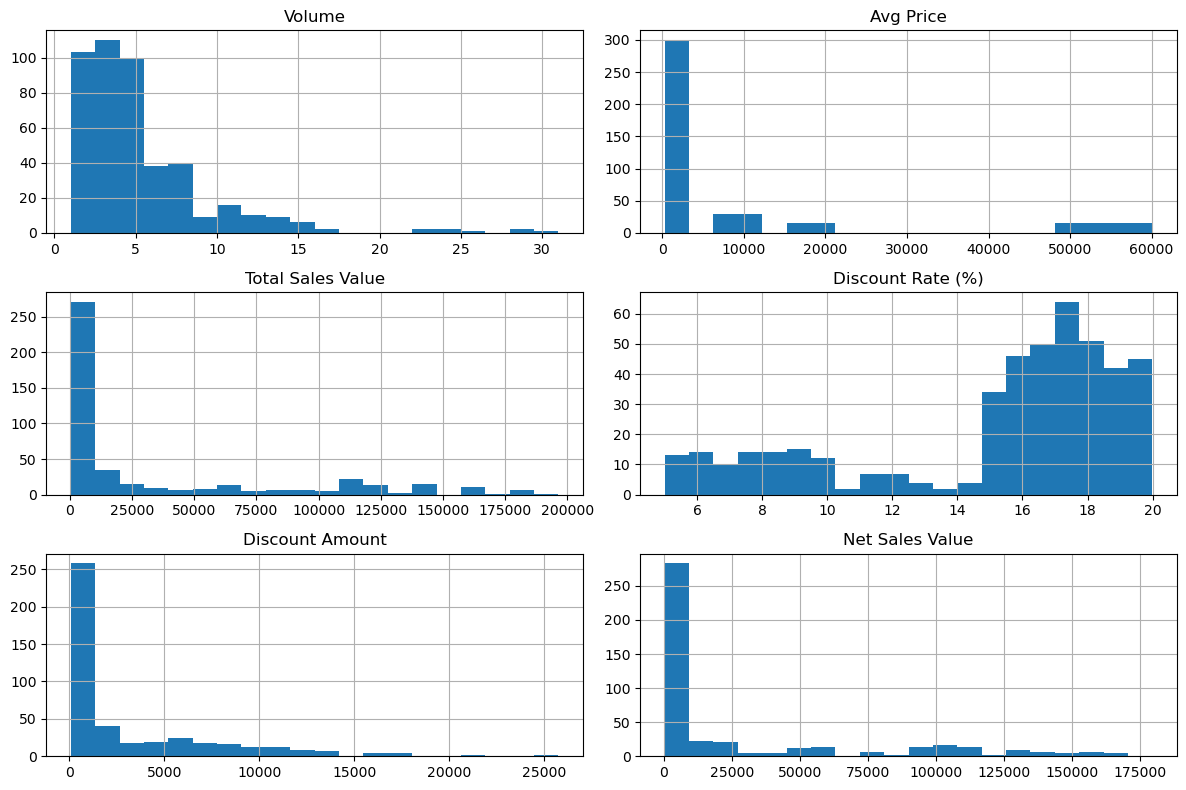

In [11]:
#Histograms:
#Plot histograms for each numerical column.
#Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

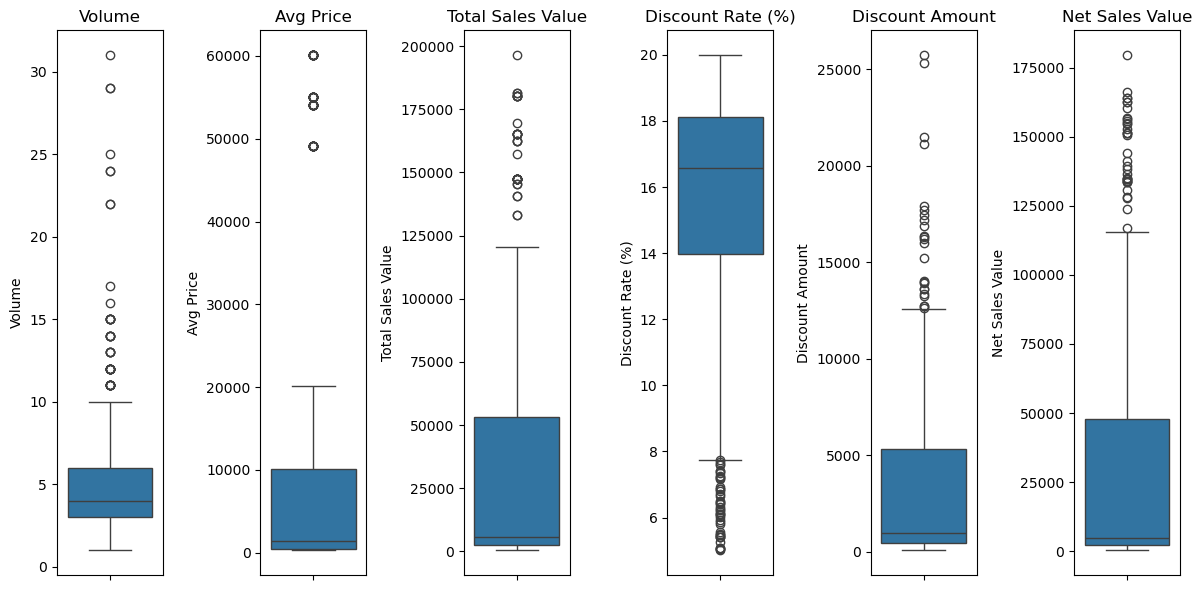

In [16]:
#●	Boxplots:
	Create boxplots for numerical variables to identify outliers and the interquartile range.Discuss any findings, such as extreme values or unusual distributions.

import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

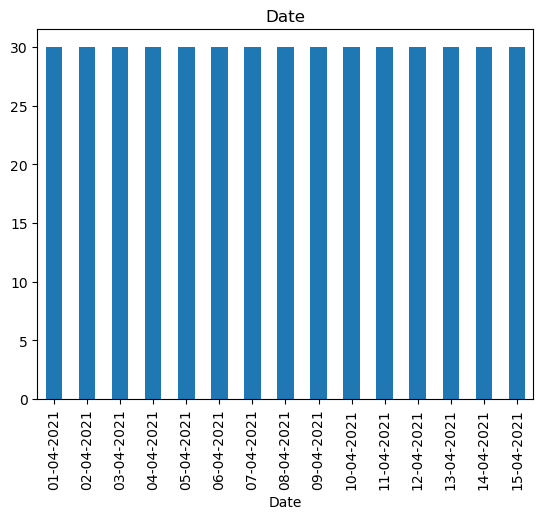

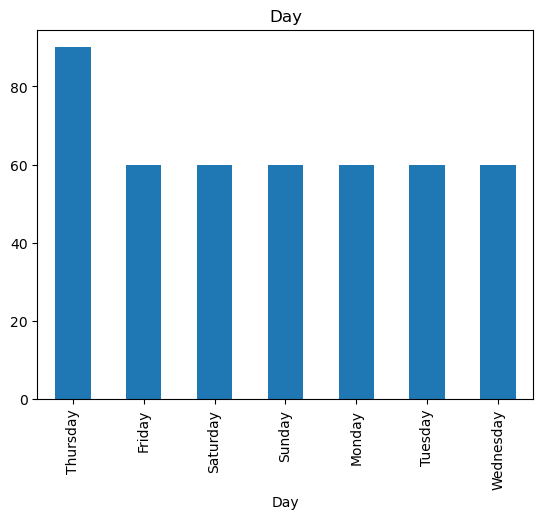

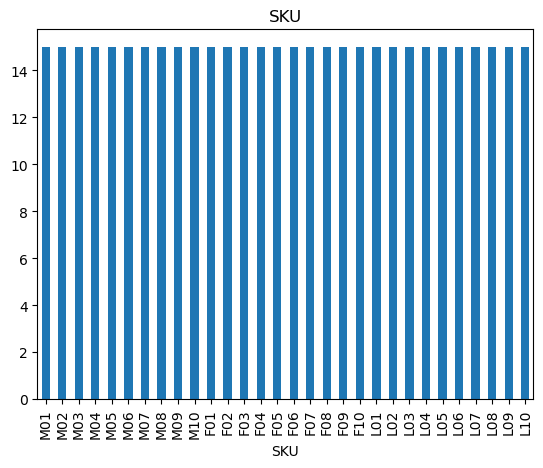

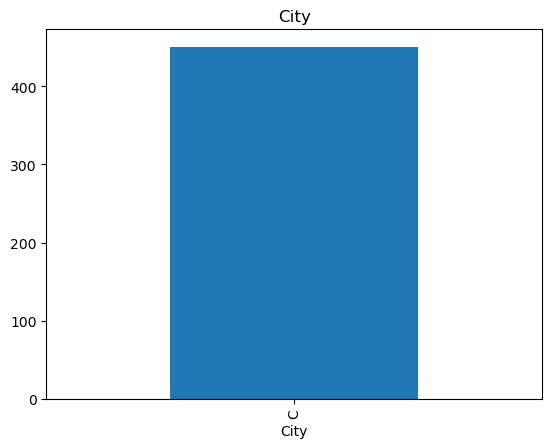

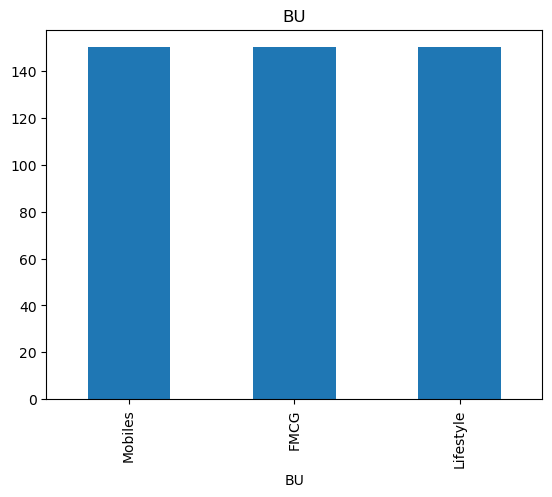

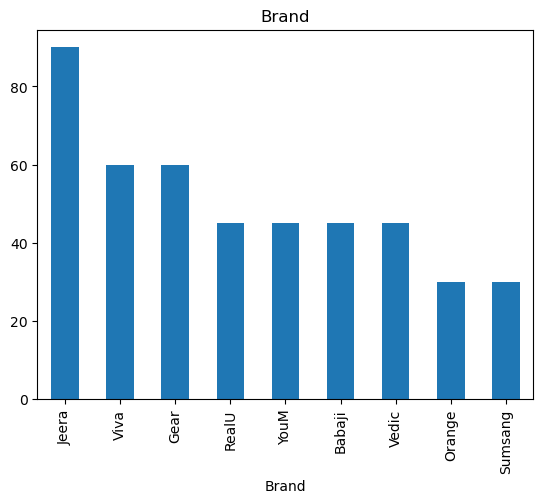

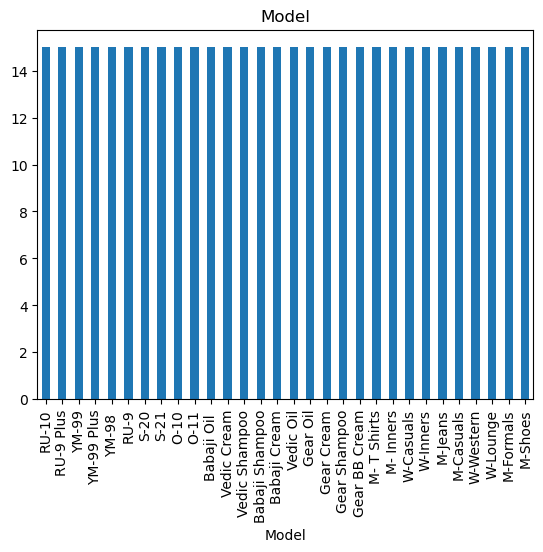

In [18]:
for col in cat_cols:
    df[col].value_counts().plot(kind='bar', title=col)
    plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

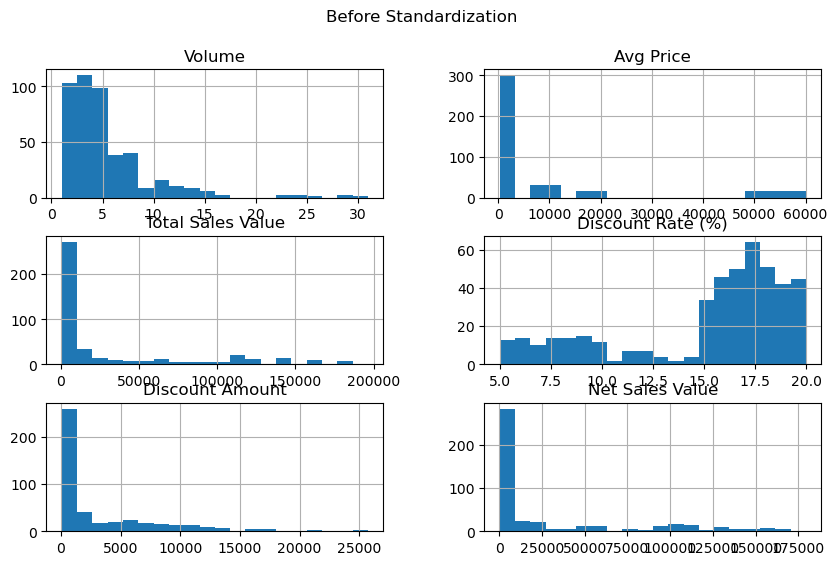

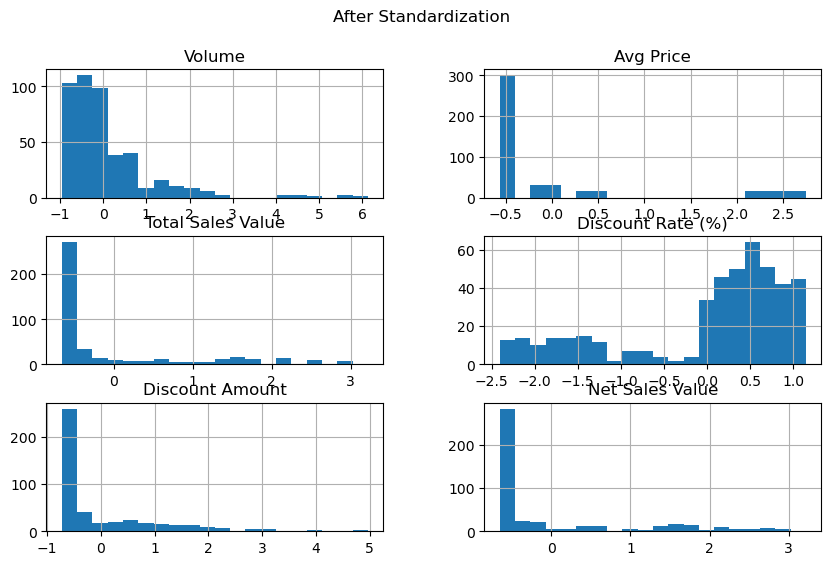

In [20]:
import matplotlib.pyplot as plt

df[numerical_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("Before Standardization")
plt.show()

df_standardized[numerical_cols].hist(figsize=(10, 6), bins=20)
plt.suptitle("After Standardization")
plt.show()

In [22]:
df_encoded = pd.get_dummies(df, columns=cat_cols)
print(df_encoded.head())


   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...